# LIBRERIA Y DATOS

Instalar librería

In [ ]:
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Cargar librería

In [ ]:
library(forecast)

1.Transformar los datos en datos ts y graficar

In [ ]:
rdoneto=c(1069019, -61909, 993753, -1764503, 56498, 496560, 144399, 251210, 2404937, 601099, 2538659, 
-9709906, 2543501, 1300608, 970936, -1034793, 359965, 4646016, 1347994, -739422, 4060201, 705810, 1209376, 
-4133809, -9063814, 576680, 5538433, 3930819, 1708644, 4600793, -5865948, -1646935, 2581939, 3065349, 2504149, 
-5018772, -6393887, 3009469, 7756290, 7145434, 7456150, 1308584, 2740205, 14632582, 15385010, 1972695, 4832850, 
-2090706, 26042875, 8706469, 9120410, -4085471, -11879476, 643854, 4190032, 18262523, 19964413, -3887608, 158185, 
-20203507, 38443967, 12009432, 11118740, -5419759, -19385828, -3377825)

In [ ]:
tiempo=c(2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2017,2017,2017,2017,2017,2017,2017,2017,
2017,2017,2017,2017,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020)

# SE COMPRUEBA NORMALIDAD

1. Estimar el modelo

In [ ]:
modelo_lineal=lm(tiempo~rdoneto)

summary(modelo_lineal)


Call:
lm(formula = tiempo ~ rdoneto)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6834 -1.5262  0.1682  1.2359  3.0991 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) 2.018e+03  2.023e-01 9973.644   <2e-16 ***
rdoneto     3.678e-08  2.224e-08    1.654    0.103    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.592 on 64 degrees of freedom
Multiple R-squared:  0.04097,	Adjusted R-squared:  0.02599 
F-statistic: 2.734 on 1 and 64 DF,  p-value: 0.1031


2. Test de shapiro-Wilks

H0: Es normal    vs    H1: no es normal


	Shapiro-Wilk normality test

data:  rstandard(modelo_lineal)
W = 0.9679, p-value = 0.08495


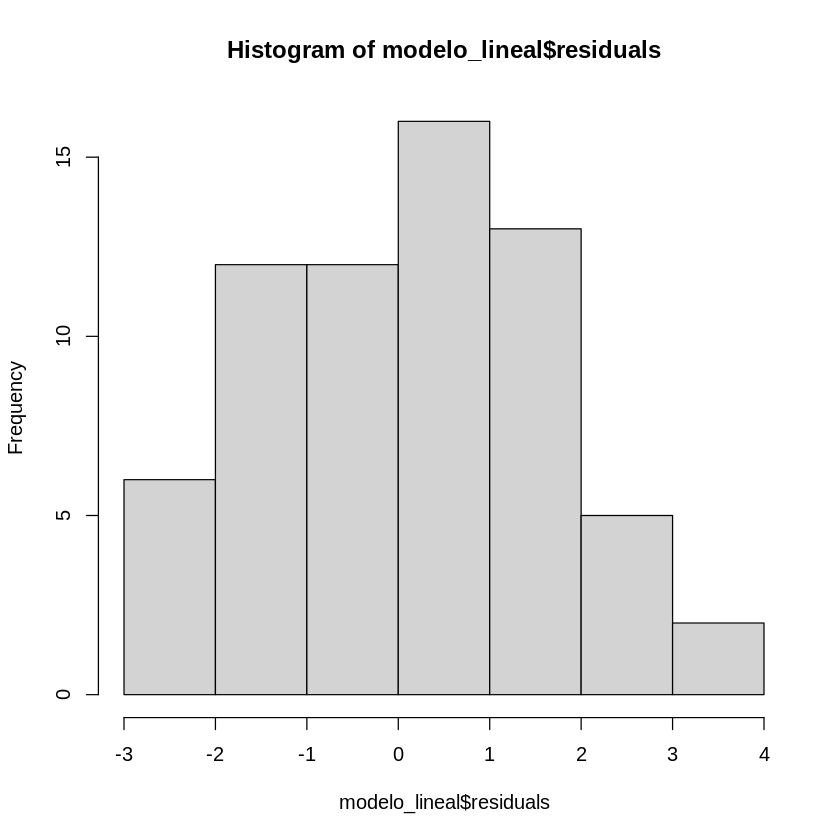

In [ ]:
shapiro.test(rstandard(modelo_lineal))

hist(modelo_lineal$residuals)

# SE COMPRUEBA HETEROCEDASTICIDAD

Test de bartlett

H0: todas las varianzas son iguales vs H1: al menos una diferente

In [ ]:
bartlett.test(rstandard(modelo_lineal)~tiempo-1)


	Bartlett test of homogeneity of variances

data:  rstandard(modelo_lineal) by tiempo
Bartlett's K-squared = 55.323, df = 5, p-value = 1.12e-10


# SE COMPRUEBA ESTACIONALIDAD

Transformar los datos en ts

In [ ]:
rdoneto.ts = ts(rdoneto, start = c(2015,7), frequency = 12)

rdoneto.ts 



,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2015,,,,,,,1069019,-61909,993753,-1764503,56498,496560
2016,144399,251210,2404937,601099,2538659,-9709906,2543501,1300608,970936,-1034793,359965,4646016
2017,1347994,-739422,4060201,705810,1209376,-4133809,-9063814,576680,5538433,3930819,1708644,4600793
2018,-5865948,-1646935,2581939,3065349,2504149,-5018772,-6393887,3009469,7756290,7145434,7456150,1308584
2019,2740205,14632582,15385010,1972695,4832850,-2090706,26042875,8706469,9120410,-4085471,-11879476,643854
2020,4190032,18262523,19964413,-3887608,158185,-20203507,38443967,12009432,11118740,-5419759,-19385828,-3377825


Gráficar

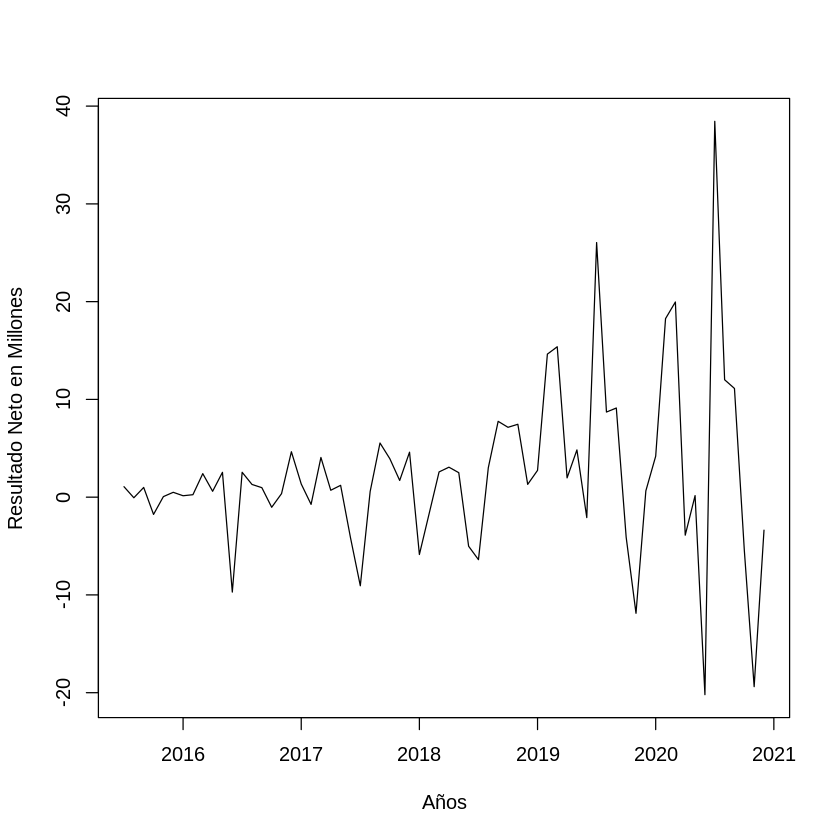

In [ ]:

plot(rdoneto.ts/1000000, ylab="Resultado Neto en Millones", xlab="Años" ,type="l",lwd=1,pch=1,cex=1,col="Black")

3.Construir el gráfico de caja y bigotes en función de los meses, para observar si existe estacionalidad

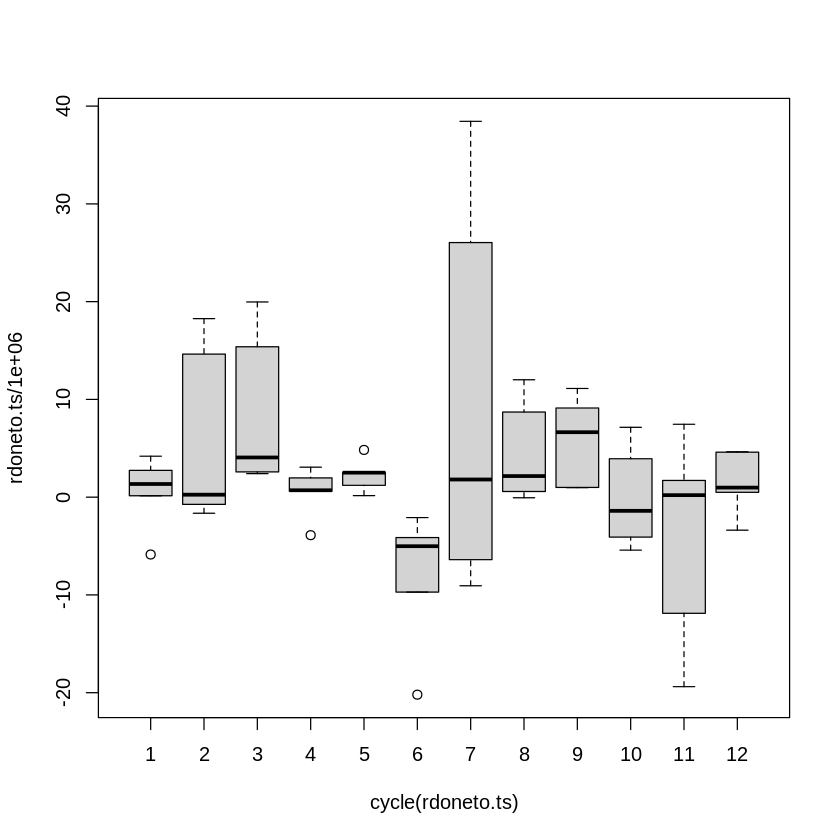

In [ ]:
boxplot(rdoneto.ts/1000000 ~ cycle(rdoneto.ts))

4.Descomponer la serie en tendencia, estacionalidad y serie estacional

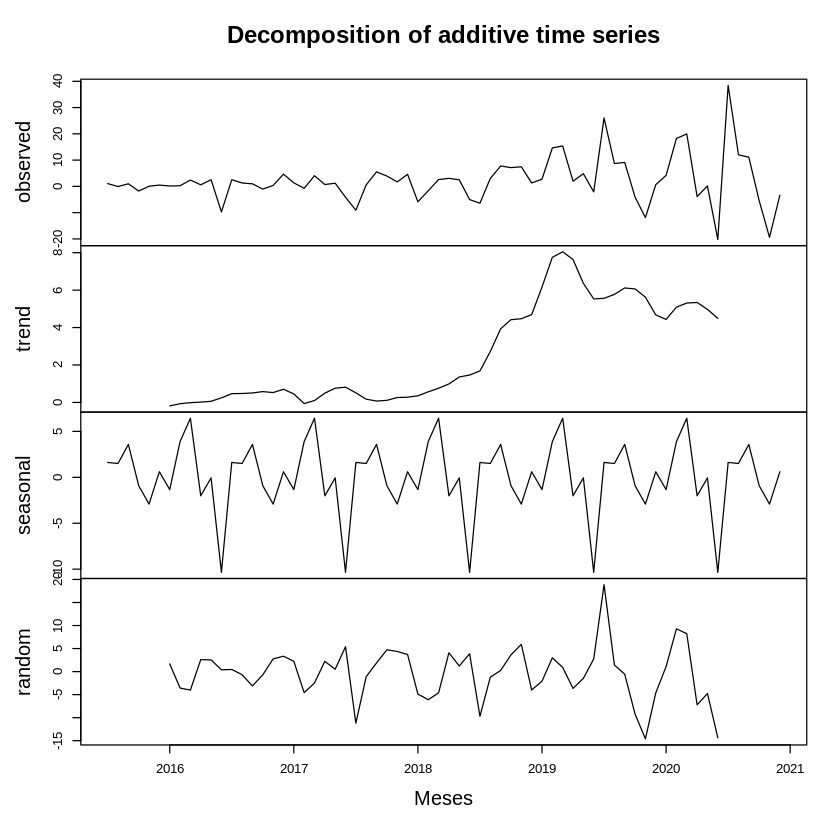

In [ ]:
rdoneto.ts.desc = decompose(rdoneto.ts/1000000)
plot(rdoneto.ts.desc, xlab='Meses')

5.Estimar el modelo SARIMA

In [ ]:
fit=arima(rdoneto.ts, order= c(4,1,1), seasonal= c(0,1,0))
summary(fit)


Call:
arima(x = rdoneto.ts, order = c(4, 1, 1), seasonal = c(0, 1, 0))

Coefficients:
          ar1      ar2      ar3      ar4      ma1
      -0.2893  -0.2240  -0.4637  -0.3774  -0.4211
s.e.   0.2077   0.1365   0.1226   0.1486   0.2170

sigma^2 estimated as 4.854e+13:  log likelihood = -911.2,  aic = 1834.41

Training set error measures:
                    ME    RMSE     MAE       MPE     MAPE      MASE        ACF1
Training set -155819.3 6243270 3777796 -11.25623 96.41704 0.5340709 -0.01884487

# PREDICCION

6.Hacer la predicción a 12 meses con sus respectivos intervalos de confianza

         Point Forecast       Lo 80     Hi 80     Lo 95    Hi 95
Jan 2021        3741532  -5187044.0  12670109  -9913547 17396611
Feb 2021       20119443  10824064.3  29414822   5903388 34335498
Mar 2021       21067735  11462373.8  30673096   6377603 35757867
Apr 2021       -6054810 -15663447.3   3553828 -20749953  8640334
May 2021       -3311671 -12921189.6   6297847 -18008161 11384819
Jun 2021      -23084594 -33178377.5 -12990811 -38521704 -7647485
Jul 2021       37485292  26818670.1  48151913  21172102 53798481
Aug 2021       12201156    970824.5  23431487  -4974154 29376465
Sep 2021       10765675   -623955.3  22155305  -6653261 28184611
Oct 2021       -6986537 -18426079.2   4453006 -24481807 10508734
Nov 2021      -21738456 -33276421.6 -10200490 -39384252 -4092659
Dec 2021       -5412813 -17175474.1   6349848 -23402251 12576624

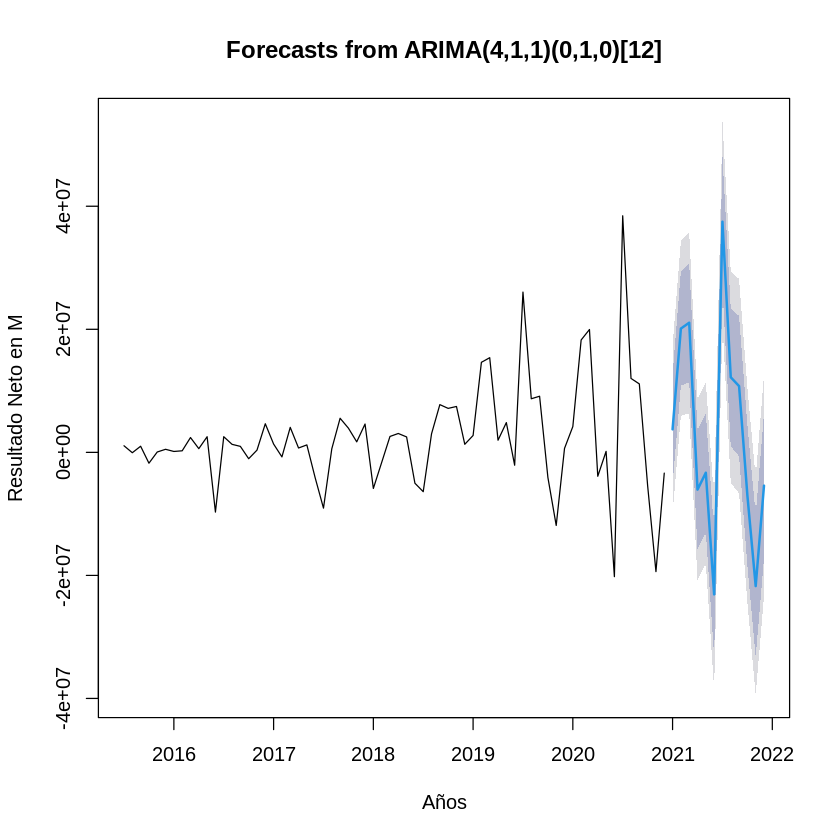

In [ ]:
plot(forecast(fit, h=12),ylab="Resultado Neto en M", xlab="Años",type="l",lwd=1,pch=1,cex=1)
forecast(fit, h=12)

7.Invertir el logaritmo

In [ ]:
predic.log=forecast(fit, h=12)

(predic.log$mean)
(predic.log$lower)
(predic.log$upper)


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2021,3741532,20119443,21067735,-6054810,-3311671,-23084594,37485292,12201156,10765675,-6986537,-21738456,-5412813


,80%,95%
Jan 2021,-5187044.0,-9913547
Feb 2021,10824064.3,5903388
Mar 2021,11462373.8,6377603
Apr 2021,-15663447.3,-20749953
May 2021,-12921189.6,-18008161
Jun 2021,-33178377.5,-38521704
Jul 2021,26818670.1,21172102
Aug 2021,970824.5,-4974154
Sep 2021,-623955.3,-6653261
Oct 2021,-18426079.2,-24481807


,80%,95%
Jan 2021,12670109,17396611
Feb 2021,29414822,34335498
Mar 2021,30673096,35757867
Apr 2021,3553828,8640334
May 2021,6297847,11384819
Jun 2021,-12990811,-7647485
Jul 2021,48151913,53798481
Aug 2021,23431487,29376465
Sep 2021,22155305,28184611
Oct 2021,4453006,10508734


In [ ]:
sum(predic.log$mean)


[1] 38791952